In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Read dataset
dataset = pd.read_csv(open("../dataset-ispq.csv"), delimiter=';')
dataset_size = dataset.shape[0]
attributes = list(dataset.columns.values)

print("The dataset has {} entries with attributes:\n{}".format(dataset_size, attributes))

# colonne:
#
#  DEFAULT_FLAG_rett_fact
#    Booleano attivo se il soggetto ha dichiarato default
#
#  perf_year
#    Anno in cui è stata fatta la rilevazione
#
#  SETTORE_INT
#    Settore industriale del soggetto
#
#  classe_indic_dim
#    Suddivisione del soggetto in classi create sulla base delle sue risorse economiche
#
#  MACRO_AREA_2b
#    Area geografica del soggetto 
#  
#  score_quant_integrato
#    Score del soggetto
#
#  ID_Fittizio
#    Id del soggetto

The dataset has 595234 entries with attributes:
['DEFAULT_FLAG_rett_fact', 'perf_year', 'SETTORE_INT', 'classe_indic_dim', 'MACRO_AREA_2b', 'score_quant_integrato', 'ID_Fittizio']


In [19]:
# ID_Fittizio

subjects = dataset['ID_Fittizio'].unique()

# Check for missing ID
assert subjects[-1] == (len(subjects)), "Missing ID"

print('There are {} subjects with an average of {} measures per subject'.format(len(subjects), dataset_size/len(subjects)))

There are 161510 subjects with an average of 3.685431242647514 measures per subject


Number of default predicted: 21399/595234 (3.60%)


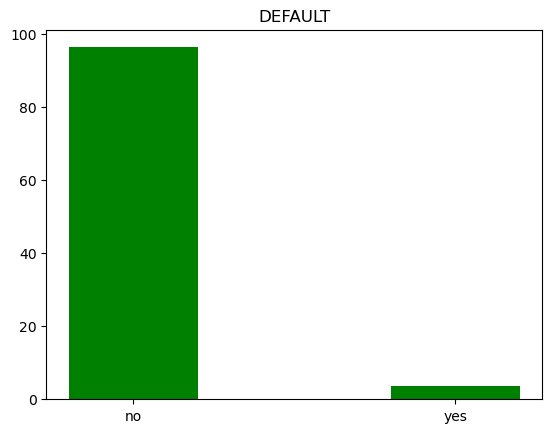

In [25]:
# DEFAULT ATTRIBUTE

# check for not admitted values
for el in dataset['DEFAULT_FLAG_rett_fact']:
    assert el != 0 or el != 1, "Default flag error: value not admitted"

no_default = dataset['DEFAULT_FLAG_rett_fact'].value_counts()[0]
yes_default = dataset['DEFAULT_FLAG_rett_fact'].value_counts()[1]
print('Number of default predicted: {}/{} ({:.2f}%)'.format(yes_default, dataset_size, yes_default/dataset_size*100))

plt.figure()
plt.bar(['no', 'yes'], [no_default/dataset_size*100, yes_default/dataset_size*100], color='green', width=0.4)
plt.title('DEFAULT')
plt.show()

Oldest sample's year: 2012, Newer sample's year: 2020


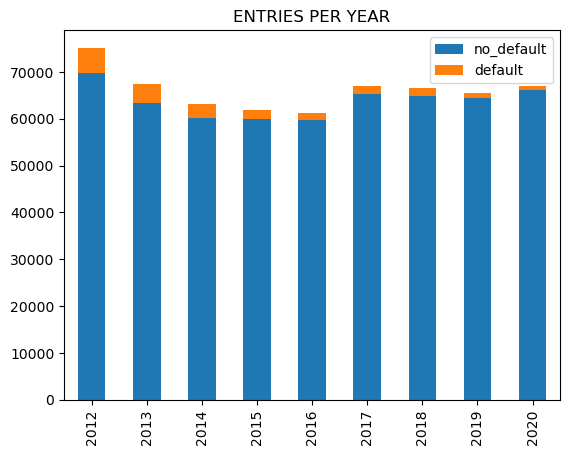

In [21]:
#  PERF_YEAR attribute

start_year = dataset['perf_year'].min()
end_year = dataset['perf_year'].max()
print("Oldest sample's year: {}, Newer sample's year: {}".format(start_year, end_year))

years = list(dataset['perf_year'].value_counts().keys().sort_values())
default_per_years = []
not_default_per_years = []

group_by_years_and_default = dataset.groupby(['perf_year','DEFAULT_FLAG_rett_fact'])['perf_year'].count()

for k in years:
    default_per_years.append(group_by_years_and_default[k][1])
    not_default_per_years.append(group_by_years_and_default[k][0])

df = pd.DataFrame({'no_default': not_default_per_years, 'default': default_per_years}, index=years)
ax = df.plot.bar(stacked=True, title='ENTRIES PER YEAR')

In [31]:
#  SETTORE_INT

counts = dataset['SETTORE_INT'].value_counts()
print('There are {} business sectors:\n{}'.format(len(counts), counts))

# settore_default = dataset.groupby(['SETTORE_INT','DEFAULT_FLAG_rett_fact'])['SETTORE_INT'].count()
# print(settore_default)

There are 24 business sectors:
Distribuzione                           125108
Servizi                                  96131
Immobiliare                              80266
Costr. e materiali per costruzioni       58311
Metallurgia e prodotti in metallo        33472
Agricoltura                              24212
Meccanica                                24157
Trasporti                                21725
Intermedi per l'industria: beni vari     19111
Sistema moda                             18947
Alimentare                               18472
Holding                                  12972
Elettrotecnica ed elettronica            12298
Utility                                  11035
N.A.                                      7882
Editoria e stampa                         6091
Chimica di base e intermedi               5640
Mobili                                    5455
Mezzi di trasporto                        4684
Altri beni di consumo                     3092
Energia ed estrazione        

There are 4 classes of company turnover:
{'00. 0 mln': 50864, '01. 0-5  mln eur': 258669, '02. 5-50 mln eur': 252793, '03. >50  mln eur': 32908}


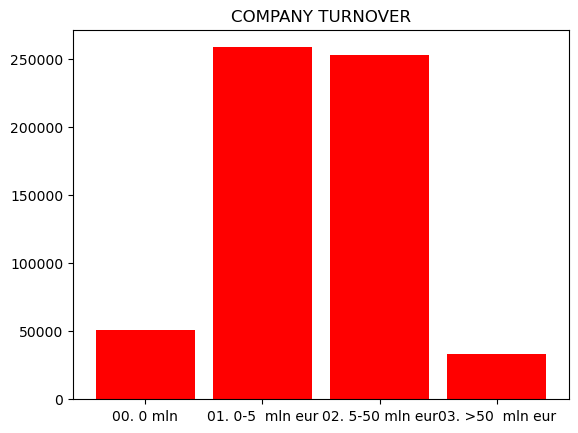

In [19]:
#  classe_indic_dim

counts = dataset['classe_indic_dim'].value_counts()
sorted_counts = dict(sorted(counts.items()))
print('There are {} classes of company turnover:\n{}'.format(len(sorted_counts), sorted_counts))

plt.figure()
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='red', width=0.85)
plt.title('COMPANY TURNOVER')
plt.show()

There are 5 geografic areas:
{'NW': 250899, 'NE': 136163, 'CE': 109328, 'SI': 86760, 'Estero': 12084}


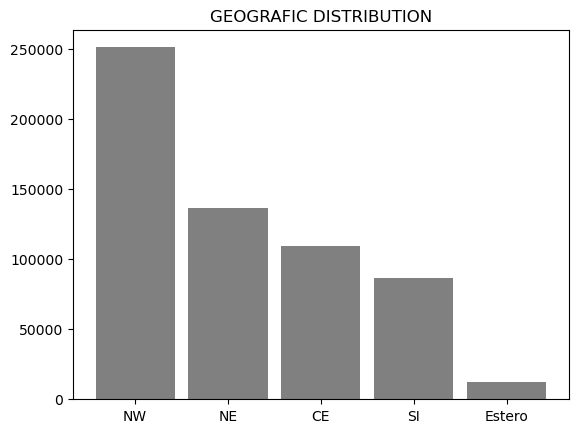

In [20]:
#  MACRO_AREA_2b

counts = dict(dataset['MACRO_AREA_2b'].value_counts())
print('There are {} geografic areas:\n{}'.format(len(counts), counts))

plt.figure()
plt.bar(counts.keys(), counts.values(), color='grey', width=0.85)
plt.title('GEOGRAFIC DISTRIBUTION')
plt.show()

Smallest score: -10.03455, largest score: 2.45948


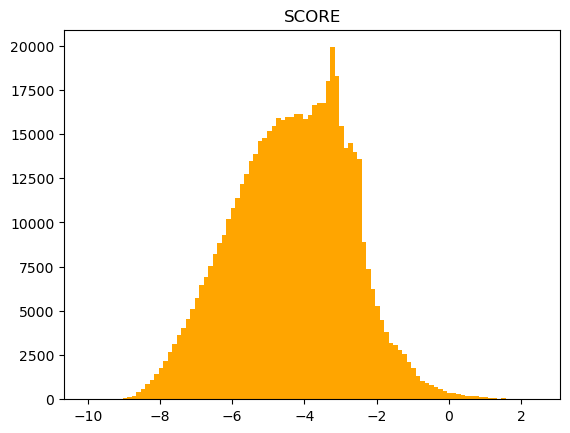

In [39]:
#  score_quant_integrato

small_score = dataset['score_quant_integrato'].min()
large_score = dataset['score_quant_integrato'].max()
print("Smallest score: {}, largest score: {}".format(small_score, large_score))

plt.figure()
discrete_score = plt.hist(dataset['score_quant_integrato'], bins=100, color='orange')
plt.title('SCORE')
plt.show()

In [22]:
# Correlations

c1 = dataset['score_quant_integrato'].corr(dataset['perf_year'])
print("Correlation between score and years: {}\n".format(c1))

def my_hash(el):
    return hash(el)

geo_id = dataset['MACRO_AREA_2b'].apply(my_hash)
c2 = dataset['score_quant_integrato'].corr(geo_id)
print("Correlation between score and geographic area: {}\n".format(c2))

turnover = dataset['classe_indic_dim'].apply(my_hash)
c3 = geo_id.corr(turnover)
print("Correlation between geografic area and company turnover: {}\n".format(c3))

def_flag = dataset['DEFAULT_FLAG_rett_fact'].apply(my_hash)
c4 = dataset['score_quant_integrato'].corr(def_flag)
print("Correlation between score and default: {}".format(c4))

Correlation between score and years: -0.3005709333919465

Correlation between score and geographic area: 0.11246382026167213

Correlation between geografic area and company turnover: -0.06494504089443763

Correlation between score and default: 0.24816665740562227


In [32]:
from itertools import product
import numpy as np

def compute_density_matrix(series_a, series_b):
    label_a = list(series_a.drop_duplicates())
    label_b = list(series_b.drop_duplicates())
    density_m = np.zeros((len(label_a), len(label_b)), dtype=int)

    all_pairs = list(product(series_a, series_b))
    for i, el_a in enumerate(label_a):
        for j, el_b in enumerate(label_b):
            density_m[i,j] = all_pairs.count((el_a, el_b))
    
    return label_a, label_b, density_m

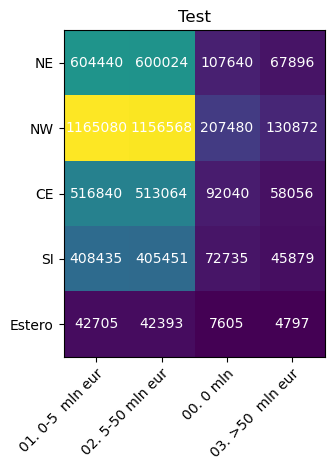

In [37]:
sample_dataset = dataset.sample(2500)
la, lb, dm = compute_density_matrix(sample_dataset['MACRO_AREA_2b'], sample_dataset['classe_indic_dim'])

fig, ax = plt.subplots()
im = ax.imshow(dm)
ax.set_xticks(np.arange(len(lb)), labels=lb)
ax.set_yticks(np.arange(len(la)), labels=la)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(la)):
    for j in range(len(lb)):
        text = ax.text(j, i, dm[i, j], ha="center", va="center", color="w")
ax.set_title("Test")
fig.tight_layout()
plt.show()

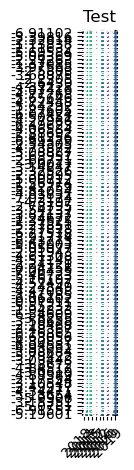

In [43]:
sample_dataset = dataset.sample(100)
la, lb, dm = compute_density_matrix(sample_dataset['score_quant_integrato'], sample_dataset['perf_year'])
fig, ax = plt.subplots()
im = ax.imshow(dm)
ax.set_xticks(np.arange(len(lb)), labels=lb)
ax.set_yticks(np.arange(len(la)), labels=la)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(la)):
    for j in range(len(lb)):
        text = ax.text(j, i, dm[i, j], ha="center", va="center", color="w")
ax.set_title("Test")
fig.tight_layout()
plt.show()